# 1 Задание
У нас есть кусочек исследования, который мы теперь хотим поставить на регулярное выполнение.
Оптимизируй код, предложи варианты изменения неоптимальных фрагментов, что еще стоит добавить или убрать, чтобы он корректно отрабатывал при последующих самостоятельных запусках.
Напиши саммари по тому, что бы ты изменил в коде и почему.

In [ ]:
# @title Первоначальный вариант:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
import time
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patheffects as path_effects
from ibis import schema
import warnings
warnings.filterwarnings("ignore")

today_dt = (datetime.today()).date()

#today_dt = today_dt - timedelta(days=1)
today = today_dt.strftime('%Y-%m-%d')
yesterday_dt = today_dt - timedelta(days=1)
yesterday = yesterday_dt.strftime('%Y-%m-%d')

two_days_ago_start = (today_dt - timedelta(days=2)).strftime('%Y-%m-%d')

week_ago_start = (today_dt - timedelta(days=7)).strftime('%Y-%m-%d')
two_weeks_ago_start = (today_dt - timedelta(days=14)).strftime('%Y-%m-%d')
yesterday, week_ago_start, two_weeks_ago_start

last_week_day = (today_dt - timedelta(days=8)).strftime('%Y-%m-%d')
last_year_day = (yesterday_dt - relativedelta(years=1)).strftime('%Y-%m-%d')


total_aviasales_bookings = session.query( f"""
    select  to_date(booked_at) as period
, count(booking_id) as total_bookings_aviasales
from bd.bookings
where to_date(booked_at)  >= '{two_weeks_ago_start}'
                and to_date(booked_at)  <= '{yesterday}'
group by 1
order by 1
""")

total_aviasales_gross_profit = session.query( f"""
     select  to_date(booked_at) as period
, sum(profit) as total_profit_aviasales

from bd.bookings
where to_date(booked_at)  >= '{two_weeks_ago_start}'
                and to_date(booked_at)  <= '{yesterday}'
group by 1
order by 1
""")
df_bookings_sender = session.query(f"""

        select booked_at
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) as bookings_sender
    , count(booking_id) as bookings
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) * 100/ count(booking_id) as share_of_sender_bookings
    from bd.bookings
    where to_date(booked_at)  >= '{two_weeks_ago_start}'
                and to_date(booked_at)  <= '{yesterday}'
    group by 1
    order by 1
            """
            )
df_bookings_sender_last_year = session.query(f"""

        select booked_at
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) as bookings_sender
    , count(booking_id) as bookings
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) * 100/ count(booking_id) as share_of_sender_bookings
    from bd.bookings
    where to_date(booked_at)  >= '{last_year_day}'
                and to_date(booked_at)  <= '{yesterday}'
    group by 1
    order by 1
            """
            )

data_copy = total_aviasales_gross_profit.copy()
data_copy['total_profit_aviasales_forc'] = data_copy.apply(lambda row: row['total_profit_aviasales'] * 2 + np.sqrt(row['total_profit_aviasales']), axis=1)

df_yesterday = data_copy.copy()
df_yesterday['period'] = (pd.to_datetime(df_yesterday['period']) - timedelta(days=1)).dt.strftime('%Y-%m-%d')

df_merged = data_copy.merge(df_yesterday, left_on='period', right_on='period', how='left')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Графики', fontsize=16)

axs[0, 0].plot(total_aviasales_bookings['period'], total_aviasales_bookings['total_bookings_aviasales'], marker='o')
axs[0, 0].set_title('Total Bookings Aviasales')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Total Bookings')

axs[0, 1].plot(total_aviasales_gross_profit['period'], total_aviasales_gross_profit['total_profit_aviasales'], marker='o')
axs[0, 1].set_title('Total Profit Aviasales')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Total Profit')

axs[1, 0].plot(df_bookings_sender['pdate'], df_bookings_mego['bookings'], marker='o')
axs[1, 0].set_title('Sender Bookings')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Bookings')

axs[1, 1].plot(df_bookings_sender_last_year['pdate'], df_bookings_mego_last_year['bookings'], marker='o')
axs[1, 1].set_title('Sender Bookings year')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Bookings')


for ax in axs.flat:
    if ax.get_title() == 'Total Bookings Aviasales':
        ax.plot(df_merged['period'].iloc[-1], total_aviasales_bookings[total_aviasales_bookings['period'] == df_merged['period'].iloc[-1]]['total_bookings_aviasales'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)
    elif ax.get_title() == 'Total Profit Aviasales':
        ax.plot(df_merged['period'].iloc[-1], total_aviasales_gross_profit[total_aviasales_gross_profit['period'] == df_merged['period'].iloc[-1]]['total_profit_aviasales'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)
    elif ax.get_title() == 'Sender Bookings':
        ax.plot(df_merged['period'].iloc[-1], df_bookings_sender[df_bookings_sender['pdate'] == df_merged['period'].iloc[-1]]['bookings'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)
    elif ax.get_title() == 'Sender Bookings':
        ax.plot(df_merged['period'].iloc[-1], df_bookings_sender_last_year[df_bookings_sender_last_year['pdate'] == df_merged['period'].iloc[-1]]['bookings'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)

plt.show()

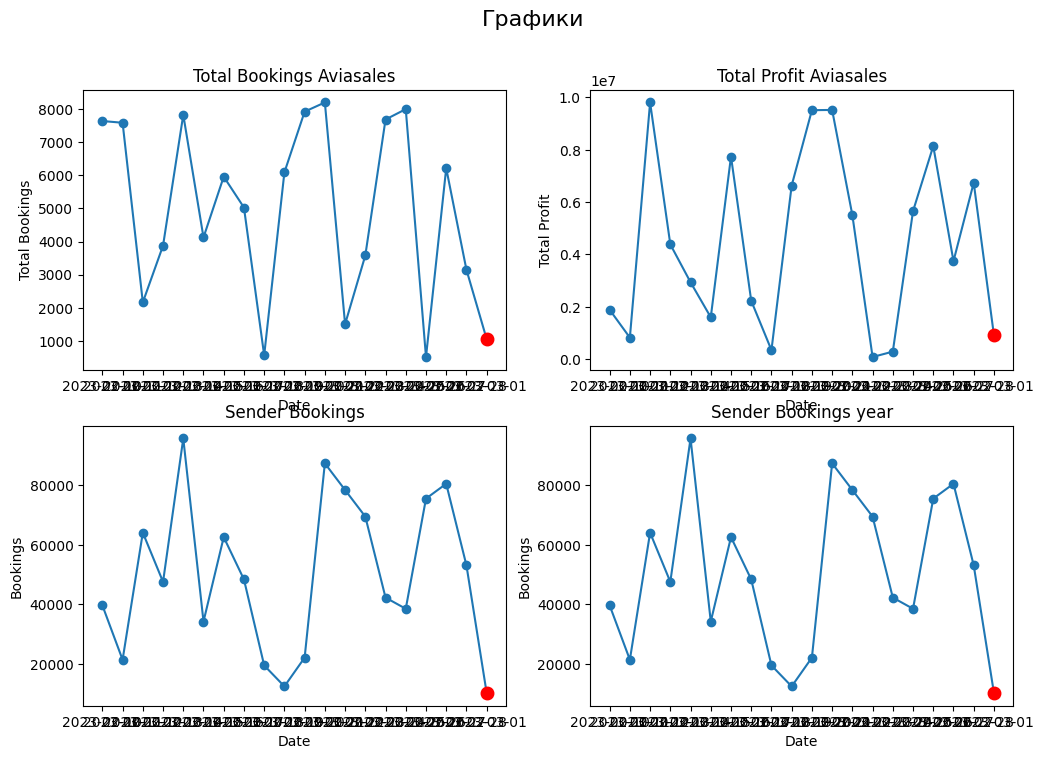

Время выгрузки скрипта:  0:00:01.002481


In [ ]:
# @title Мое решение:
# сначала генерирую свои данные, чтобы проверить работоспособность в конце (моделирование данных)

from numpy import random
import datetime
from datetime import timedelta
import pandas as pd

start = datetime.datetime.strptime('2023-02-10', '%Y-%m-%d')
end = datetime.datetime.strptime('2023-03-01', '%Y-%m-%d')

daterange = [(start + timedelta(days=x)).strftime('%Y-%m-%d') for x in range(((end-start).days)+1)]
random_ids_1 = list(random.randint(10000, size=(20)))
random_ids_2 = list(random.randint(100000, size=(20)))
money = list(random.randint(10000000, size=(20)))

total_aviasales_bookings = pd.DataFrame({'period':daterange, 'total_bookings_aviasales':random_ids_1})
total_aviasales_gross_profit = pd.DataFrame({'period':daterange, 'total_profit_aviasales':money})
df_bookings_sender = pd.DataFrame({'booked_at':daterange, 'bookings_sender':random_ids_1, 'bookings':random_ids_2})
df_bookings_sender_last_year = pd.DataFrame({'booked_at':daterange, 'bookings_sender':random_ids_1, 'bookings':random_ids_2})
df_bookings_sender['prop'] = df_bookings_sender['bookings_sender'] / df_bookings_sender['bookings'] * 100
df_bookings_sender_last_year['prop'] = df_bookings_sender_last_year['bookings_sender'] / df_bookings_sender_last_year['bookings'] * 100


# ниже мой вариант оптимизации и рефакторинга кода

# эти пакеты не используются в скрипте
# from dateutil.relativedelta import relativedelta
# import time
# from PIL import Image
# import matplotlib.patheffects as path_effects
# from ibis import schema

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # полезно для пропуска предупреждений типа деления массивов друг на друга, но в случае реальной ошибки фильтр ее не пропусти, для этого нужно исключать используя функцию python типа try except

start = datetime.now() # начало выгрузки

# используем функции SQL
# today_dt = (datetime.today()).date()
# today = today_dt.strftime('%Y-%m-%d')
# yesterday_dt = (today_dt - timedelta(days=1))
# yesterday = yesterday_dt.strftime('%Y-%m-%d')
# two_days_ago_start = (today_dt - timedelta(days=2)).strftime('%Y-%m-%d')
# week_ago_start = (today_dt - timedelta(days=7)).strftime('%Y-%m-%d')
# two_weeks_ago_start = (today_dt - timedelta(days=14)).strftime('%Y-%m-%d')
# yesterday, week_ago_start, two_weeks_ago_start
# last_week_day = (today_dt - timedelta(days=8)).strftime('%Y-%m-%d')
# last_year_day = (yesterday_dt - relativedelta(years=1)).strftime('%Y-%m-%d')



# выгружаем в датафреймы данные с помощью SQL

total_aviasales_bookings_ = session.query("""
    select  to_date(booked_at) as period
, count(booking_id) as total_bookings_aviasales
from bd.bookings
where to_date(booked_at)  BETWEEN current_date - 14 -- текущая дата минус 14 дней
                and current_date - 1 -- текущая дата минус 1 день
group by 1
order by 1
""")

total_aviasales_gross_profit_ = session.query("""
     select  to_date(booked_at) as period
, sum(profit) as total_profit_aviasales

from bd.bookings
where to_date(booked_at)  BETWEEN current_date - 14 -- текущая дата минус 14 дней
                and current_date - 1 -- текущая дата минус 1 день
group by 1
order by 1
""")
df_bookings_sender_ = session.query("""

        select booked_at
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) as bookings_sender
    , count(booking_id) as bookings
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) * 100/ count(booking_id) as share_of_sender_bookings
    from bd.bookings
    where to_date(booked_at)  BETWEEN current_date - 14 -- текущая дата минус 14 дней
                and current_date - 1 -- текущая дата минус 1 день
    group by 1
    order by 1
            """
            )
df_bookings_sender_last_year_ = session.query("""

        select booked_at
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) as bookings_sender
    , count(booking_id) as bookings
    , count(if(sender_id in (10, 20, 30), booking_id, Null)) * 100/ count(booking_id) as share_of_sender_bookings
    from bd.bookings
    where to_date(booked_at)  BETWEEN current_date - interval '1 year' -- текущая дата минус 1 год
                and current_date - 1 -- текущая дата минус 1 день
    group by 1
    order by 1
            """
            )



# проводим манипуляции с данными

data_copy = total_aviasales_gross_profit.copy() # Лучше все копии делать сразу после выгрузки
df_yesterday = data_copy.copy()

# data_copy['total_profit_aviasales_forc'] = data_copy.apply(lambda row: row['total_profit_aviasales'] * 2 + np.sqrt(row['total_profit_aviasales']), axis=1) необязательно использовать функцию, можно просто провести последовательное умножение и суммирование с применением функции numpy.sqrt

data_copy['total_profit_aviasales_forc'] = data_copy['total_profit_aviasales'] * 2 + np.sqrt(data_copy['total_profit_aviasales']) # одинаковый результат, но отработает быстрее

df_yesterday['period'] = (pd.to_datetime(df_yesterday['period']) - timedelta(days=1)).dt.strftime('%Y-%m-%d')

df_merged = data_copy.merge(df_yesterday, left_on='period', right_on='period', how='left')



# рисуем графики

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Графики', fontsize=16)

# 1
axs[0, 0].plot(total_aviasales_bookings['period'],
               total_aviasales_bookings['total_bookings_aviasales'],
               marker='o')
axs[0, 0].plot(df_merged['period'].iloc[-1],
               total_aviasales_bookings[total_aviasales_bookings['period'] == df_merged['period'].iloc[-1]]['total_bookings_aviasales'],
               marker='o',
               markersize=8,
               label='Last Date',
               color='red',
               markeredgewidth=2)
axs[0, 0].set_title('Total Bookings Aviasales')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Total Bookings')

# 2
axs[0, 1].plot(total_aviasales_gross_profit['period'],
               total_aviasales_gross_profit['total_profit_aviasales'],
               marker='o')
axs[0, 1].plot(df_merged['period'].iloc[-1],
               total_aviasales_gross_profit[total_aviasales_gross_profit['period'] == df_merged['period'].iloc[-1]]['total_profit_aviasales'],
               marker='o',
               markersize=8,
               label='Last Date',
               color='red',
               markeredgewidth=2)
axs[0, 1].set_title('Total Profit Aviasales')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Total Profit')

# 3
axs[1, 0].plot(df_bookings_sender['booked_at'],
               df_bookings_sender['bookings'],
               marker='o') #была ошибка в названии датафрейма
axs[1, 0].plot(df_merged['period'].iloc[-1],
               df_bookings_sender[df_bookings_sender['booked_at'] == df_merged['period'].iloc[-1]]['bookings'],
               marker='o',
               markersize=8,
               label='Last Date',
               color='red',
               markeredgewidth=2)
axs[1, 0].set_title('Sender Bookings')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Bookings')

# 4
axs[1, 1].plot(df_bookings_sender_last_year['booked_at'],
               df_bookings_sender_last_year['bookings'],
               marker='o') #была ошибка в названии датафрейма
axs[1, 1].plot(df_merged['period'].iloc[-1],
               df_bookings_sender_last_year[df_bookings_sender_last_year['booked_at'] == df_merged['period'].iloc[-1]]['bookings'],
               marker='o',
               markersize=8,
               label='Last Date',
               color='red',
               markeredgewidth=2)
axs[1, 1].set_title('Sender Bookings year')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Bookings')


# используем реализацию выше напрямую при создании графиков
# for ax in axs.flat:
#     if ax.get_title() == 'Total Bookings Aviasales':
    #     ax.plot(df_merged['period'].iloc[-1], total_aviasales_bookings[total_aviasales_bookings['period'] == df_merged['period'].iloc[-1]]['total_bookings_aviasales'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)
    # elif ax.get_title() == 'Total Profit Aviasales':
    #     ax.plot(df_merged['period'].iloc[-1], total_aviasales_gross_profit[total_aviasales_gross_profit['period'] == df_merged['period'].iloc[-1]]['total_profit_aviasales'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)
    # elif ax.get_title() == 'Sender Bookings':
    #     ax.plot(df_merged['period'].iloc[-1], df_bookings_sender[df_bookings_sender['pdate'] == df_merged['period'].iloc[-1]]['bookings'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)
    # elif ax.get_title() == 'Sender Bookings':
    #     ax.plot(df_merged['period'].iloc[-1], df_bookings_sender_last_year[df_bookings_sender_last_year['pdate'] == df_merged['period'].iloc[-1]]['bookings'], marker='o', markersize=8, label='Last Date', color='red', markeredgewidth=2)


plt.show()

end = datetime.now() # окончание выгрузки
print("Время выгрузки скрипта: ", end - start) # сколько времени шла выгрузка

## Ответ на задание 1:


Добавил комментарии в коде выше с учетом изменений, которые я бы применил. Ниже расписал итоговую логику и саммари по оптимизации / замене кода:

*Также в начале сгенерировал данные, чтобы в итоге проверить работоспособность и время выполнения*

1. **Импорт библиотек:** выделил возможность использовать только необходимые пакеты (библиотеки) pyhon, чтобы при автоматической настройке не инициализировать каждый раз лишние

2. **Блок с датами:** выделил как альтернативный вариант использование этих периодов с помощью включенных в SQL функций, чтобы не загружать их каждый раз в python и использовать библиотеки, а грузить напрямую через запросы, чтобы нагрузка была на стороне сервера

3. **Блок с SQL:** максимум данных получаем из sql - это нагружает сервер на стороне выгрузки - python только адаптирует под датафрейм и в итоге мы получаем готовые данные, с которыми далее проще работать, это визуально сокращает общий скрипт и немного влияет на оптимизацию локального сервера python
Добавил функции на примере postgresql внутри запросов, которые решают нашу задачу

4. **Блок с функциями и копиями:** не применял бы метод apply, а просто последовательно провел операции, чтобы не использовать функцию, которая будет проходить по каждой строке, немного оптимизирует время, а если нам необходимо получить для каждой даты ее предыдущее значение - с этим так же могут помочь функции SQL, которые обработают запрос на стороне и подготовят для нас готовые данные, останется только отрисовать. Но если такого решения нет - можно попробовать использовать функцию np.vectorize - она чуть-чуть увеличит скорость выполнения и сократит нагрузку на память, но я бы применял функцию к датафрейму только для операций с условными выражениями

5. **Блок с графиками:** В некоторых местах были ошибки в названиях датафреймов и заголовков - это не дало бы выполнять код, выпадала бы ошибка, также мне удалось визуально улучшить код для восприятия и оптимизировать последний цикл для отображения красного маркера на графиках использовав эти шаги внутри создания самих графиков, чтобы в последствии не перебирать их снова

###Общий саммари:
- Использовать комментарии в коде, это поможет лучше в нем разбираться, соблюдать качественный контроль версий и в случае, когда создатель не может его починить или дополнить сам - позволит другим быстрее его осознать и решить задачу
- Решая такой кейс на своей стороне, я бы использовал максимум возможностей SQL для выгрузки уже готовых данных, это сокращает код и визуально делает его чище, а также позволяет часть нагрузки переложить на сервер sql, но все зависит от конкретной задачи
- Для отображения графиков, я бы использовал другие масштабы или библиотеку plotly, чтобы лучше отобразить даты и сами данные, и если позволяет задача, то можно было бы объединить часть данных, чтобы лучше описать их смысл между собой
- Это не очень сложный и большой код, но все равно, можно использовать функции обработки ошибок, которые есть в python, чтобы на будущее исключить моменты, когда наши динамические данные принимают нестандартные значения и ломают выполнение кода (try-except), например, где мы принимаем функции
- И последний комментарий связан с будущей реализацией подобных исследований, если у нас будет такой запрос, то имеет смысл весь этот процесс реализовать через классы, где с помощью магических методов и функций все это описать, а может и засунуть в библиотеку, чтобы в дальнейшем использовать "одну" кнопку для построения графиков и подсчета метрик


Постарался описать шаги и действия с помощью комментариев, на текущий момент (используя сгенерированные данные) - код работает, но нужно исключить SQL запросы для выполнения :))


# 2 Задание
В поисковую выдачу билетов была разработана и внедрена скоринговая модель, ранжирующая билеты.
Ее цель - помочь пользователю выбрать лучший авиабилет самым быстрым способом, подняв его в топ выдачи.

Пожалуйста, внимательно изучи поисковую выдачу сайта, предложи и объясни, почему ты решил именно так:

Какие метрики нужны для отслеживал качества ранжирования билетов?

Какие визуализации могли бы помочь быстро подсветить проблему и разобраться менеджерам самостоятельно, что пошло не так?

Что важно учесть и какие срезы стоит смотреть дополнительно?

## Ответ на задание 2:

В контексте поисковой выдачи для ранжирования билетов важно учитывать не только количество билетов, которые были проданы, но и то, как пользователи воспринимают результаты поиска. Необходимо построить классную и понятную воронку шагов с глубиной проникновения - она поможет выявить слабые места и если ее модернизировать с помощью фильтров / сегментов и тд, то она реально может помочь быстро и качественно обработать ошибки

Для отслеживания качества ранжирования билетов и улучшения пользовательского опыта следует обратить внимание на следующие метрики и визуализации:

### Метрики для отслеживания качества ранжирования билетов:



1. Click-Through Rate (CTR):
    - Доля кликов на билеты из поисковой выдачи относительно числа показов. Эта метрика покажет, насколько привлекательными считаются билеты пользователем. Нам важно отслеживать кликабельность билетов после изменения ранжирования, чтобы замерять положительное влияние и негативное. (Мы ожидаем увеличение этой метрики)

2. Conversion Rate:
    - Доля успешных покупок билетов относительно числа посещений страницы с поисковой выдачей. Это позволит оценить, насколько результаты поиска приводят к реальным покупкам. Нам так или иначе после кликабельности хотелось бы замерять денежную метрику, чтобы осознавать, зарабатываем ли мы на новой фиче. (После добавления нового ранжирования, мы ожидаем увеличение этой метрики)

3. Bounce Rate:
    - Доля случаев, когда пользователь уходит с сайта сразу после просмотра поисковой выдачи. Это может указать на неудовлетворительное качество выдачи. Поможет нам оценить активность клиентов и понять, если что-то не так... (Мы ожидаем, что этот показатель снизится)

4. Доп: Мы также можем мониторить поведенческие метрики, замерять first time user experience по новичкам, некие прокси показатели (некоторые менее чувствительные, но эффективные в долгосрок):
    - retention rate (Важно, что показатель рос после добавления ранжирования)
    - LTV (Можно считать через накопительный ARPU в рамках года и важно в разрезе когорт увидеть рост)
    - DAU WAU MAU (Мы ожидаем увеличение в перспективе n-периода времени)
    - avg session duration (Тут важно понять, что для нас важно: снизить или увеличить этот показатель, ранжирование помогает снизить, а вдруг мы захотим размещать рекламу на сайте среди выдачи и нам важно, чтобы клиент больше времени провел в приложении..)
    - revenue (нам важно увеличить доход в итоге)
    - avg handling time / treatment rate  (Если поток клиентов сильно увеличится, то важно отслеживать время обработки запросов и процент успешных обработок со стороны контактного центра)


### Визуализации для идентификации проблем и улучшения пользовательского опыта:

1. Гистограмма CTR в разрезе сегментов (регион, возраст, доход..):
    - Позволит увидеть, как распределяется кликабельность в разрезе дат после добавления фичи, также можно добавить фильтр на новых/старых клиентов. Это может помочь выявить ошибки при снижении показателя.

2. Тепловая карта кликов / сбор событий / CJM:
    - Показывает места, на которые пользователи чаще всего кликают в поисковой выдаче. Новым ранжированием мы можем повлиять на CJM клиента и важно понять, в лучшую или худшую сторону. Так как есть доп. контент на странице страны, нам может быть важно, чтобы клиент читал статьи, смотрел карту города и важные места, тем более, если мы зарабатываем на этом, а из-за новой фичи он может, например, быстрее уходить из приложения


3. График продажи билетов за определенный момент (день / час / неделю) в разрезе сегментов
    - График кликабельности может чувствовать себя хорошо, но при этом кол-во продаваемых билетов может снизится и этот график должен позволить мониторить это, и благодаря различным фильтрам в моменте получить выводы

### Дополнительные срезы для анализа:

1. Сегментация по времени суток:
    - Просматривать метрики в зависимости от времени суток может помочь увидеть, как меняется поведение пользователей и восприятие выдачи в разное время. Может клиенты вечером менее активные и не нужно сразу предлагать им дешевые или оптимальные билеты, а дать возможность выбрать билеты другой категории и возможно совершить up sell

2. Сегментация по категориям билетов:
    - Анализировать метрики в зависимости от категорий билетов (например, эконом, бизнес-класс) позволит увидеть, какие категории чаще привлекают внимание пользователей, и насколько успешны они с точки зрения конверсии. Мы можем сильно повлиять на "бедных" клиентов, улучшить их опыт, но ухудшить у "богатого" сегмента клиентов, а они могут приносить больше денег, надо смотреть средний чек среди богатых и бедных по отдельности

3. Сравнение метрик по устройствам:
    - Изучение метрик по различным устройствам (мобильные устройства, платформы, десктопы) может помочь понять, как различается восприятие выдачи в зависимости от типа устройства. На ios клиенты могут покупать быстрее и более дорогие билеты, возможно наша фича будет предлагать им сразу дешевые билеты и тем самым произойдет down sell

4. Сравнение по регионам продажи:
    - Изучение метрик в разрезе по регионам, может помочь выявить интересные патерны поведения клиентов в разных локациях. С помощью регионов мы сможем выявить регионы с сильным и слабым влиянием фичи, чтобы в дальнейшем модернизировать. Например, в Ростове фича работает лучше, тк там ищут реально дешевые билеты, а в Москве фича проигрывает из-за другого поведения клиентов

5. Сравнение по регионам назначения билетов (куда клиент собирается полететь):
    - Изучение показателей в разрезе стран / городов, куда собирается клиент может помочь выявить ошибки и аномальные изменения, например, раньше чаще покупали билеты в Дубай или Европу, а после ранжирования стали покупать больше в Азию - вопрос, как это влияет на доход, влияет ли, почему так произошло, мы потеряли клиентов или сменился фокус, но стали покупать билеты в дешевые направления...

